In [78]:
import importlib
from library import data_preprocess as dp
import matplotlib.pyplot as plt
importlib.reload(dp)
import pickle

In [3]:
file_path = "./data/shortjokes.csv"

In [4]:
file_path = dp.download_data('https://github.com/amoudgl/short-jokes-dataset/raw/master/shortjokes.csv')

100% [........................................................................] 24085786 / 24085786

In [5]:
jokes = dp.load_data(file_path, header=True, sep=',')
jokes = list(jokes['Joke'].values)
print(jokes[:10])

['[me narrating a documentary about narrators] "I can\'t hear what they\'re saying cuz I\'m talking"', 'Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men.', "I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.", 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-', 'Two guys walk into a bar. The third guy ducks.', "Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo", 'Why was the musician arrested? He got in treble.', 'Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.', "What do you do if a bird shits on your car? Don't ask her out again.", 'He was a real gentlemen and always opened the fridge door for me']


In [6]:
unique_chars = dp.get_unique_chars(jokes)
print(len(unique_chars))
print(unique_chars)

97
['\x08', '\x10', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~']


In [7]:
dp.get_char_presence(jokes)

Number of sentences containing each char is,
{'\x08': 1, '\x10': 1, ' ': 231626, '!': 27146, '"': 32180, '#': 709, '$': 1377, '%': 1141, '&': 3672, "'": 103713, '(': 4642, ')': 5112, '*': 8093, '+': 285, ',': 65381, '-': 20099, '.': 165924, '/': 3276, '0': 9450, '1': 11120, '2': 8757, '3': 5688, '4': 4211, '5': 5343, '6': 3356, '7': 2809, '8': 2937, '9': 3997, ':': 22914, ';': 2011, '<': 52, '=': 401, '>': 42, '?': 107332, '@': 137, 'A': 51661, 'B': 34268, 'C': 27127, 'D': 30005, 'E': 17906, 'F': 17160, 'G': 17579, 'H': 43375, 'I': 101063, 'J': 14394, 'K': 9474, 'L': 15225, 'M': 38297, 'N': 23971, 'O': 20520, 'P': 20749, 'Q': 3662, 'R': 16686, 'S': 42278, 'T': 57790, 'U': 8458, 'V': 5342, 'W': 91649, 'X': 911, 'Y': 19413, 'Z': 1041, '[': 5614, '\\': 81, ']': 5615, '^': 401, '_': 387, '`': 63, 'a': 228550, 'b': 146215, 'c': 181352, 'd': 208809, 'e': 229961, 'f': 152087, 'g': 167174, 'h': 220564, 'i': 224621, 'j': 32634, 'k': 137166, 'l': 203768, 'm': 176857, 'n': 223407, 'o': 228302, 'p

In [8]:
print("Total number of jokes = ", len(jokes))
filter_jokes = dp.filter_data(jokes, "^[a-zA-Z !\"',.?\-\:\*]+$")
print(len(filter_jokes))
print(filter_jokes[:10])

Total number of jokes =  231657
189962
['Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men.', "I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.", 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-', 'Two guys walk into a bar. The third guy ducks.', "Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo", 'Why was the musician arrested? He got in treble.', 'Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.', "What do you do if a bird shits on your car? Don't ask her out again.", 'He was a real gentlemen and always opened the fridge door for me', 'Telling my daugthers date that "she has lice and its very contagious the closer you get to her." *Correct way to parent.']


In [43]:
special_chars = [' ', '!', '"', "'", '*', ',', '-', '.', ':', '?']
clean_jokes = dp.clean_data(jokes, "^[a-zA-Z !\"'*,\-.:?]+$", special_chars)

unique_chars = dp.get_unique_chars(clean_jokes)
print(len(unique_chars))
print(unique_chars)

clean_jokes = dp.tokenize(clean_jokes)

print(len(clean_jokes))
print(clean_jokes[:2])

# stats of number of tokens in the sentence
dp.get_len_stats(clean_jokes)

36
[' ', '!', '"', "'", '*', ',', '-', '.', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
189962
[['telling', 'my', 'daughter', 'garlic', 'is', 'good', 'for', 'you', '.', 'good', 'immune', 'system', 'and', 'keeps', 'pests', 'away', '.', 'ticks', ',', 'mosquitos', ',', 'vampires', 'threedots', 'men', '.'], ['i', "'", 've', 'been', 'going', 'through', 'a', 'really', 'rough', 'period', 'at', 'work', 'this', 'week', 'it', "'", 's', 'my', 'own', 'fault', 'for', 'swapping', 'my', 'tampax', 'for', 'sand', 'paper', '.']]
min of length:  1
max of length:  107
average length:  21.061649171939653
mode of length:  16


In [44]:
MIN_NUM_TOKENS = 6
MAX_NUM_TOKENS = 40
clean_jokes = dp.filter_data_on_length(clean_jokes, MIN_NUM_TOKENS, MAX_NUM_TOKENS)
print(len(clean_jokes))

183347


In [49]:
word_freqs = dp.get_vocabulary(clean_jokes)

In [50]:
dp.get_vocabulary_stats(word_freqs)

Total vocabulary:  53676
average of frequency:  69.59490274983233
mode of frequency:  1


In [59]:
filtered_words = dp.filter_words(word_freqs, 20)
print("Number of filtered words = ", len(filtered_words))
sents = dp.get_sentences_with_words(clean_jokes, filtered_words)
print(len(sents))
print(sents[:5])

Number of filtered words =  8131
91269
[['two', 'guys', 'walk', 'into', 'a', 'bar', '.', 'the', 'third', 'guy', 'ducks', '.'], ['what', 'do', 'you', 'do', 'if', 'a', 'bird', 'shits', 'on', 'your', 'car', '?', 'don', "'", 't', 'ask', 'her', 'out', 'again', '.'], ['he', 'was', 'a', 'real', 'gentlemen', 'and', 'always', 'opened', 'the', 'fridge', 'door', 'for', 'me'], ['you', 'ever', 'notice', 'that', 'the', 'most', 'dangerous', 'thing', 'about', 'marijuana', 'is', 'getting', 'caught', 'with', 'it', '?'], ['my', 'wife', 'is', 'in', 'a', 'bad', 'mood', '.', 'i', 'think', 'her', 'boyfriend', 'forgot', 'their', 'anniversary', '.', 'way', 'to', 'go', ',', 'dude', '.', 'now', 'we', 'all', 'suffer', 'threedots']]


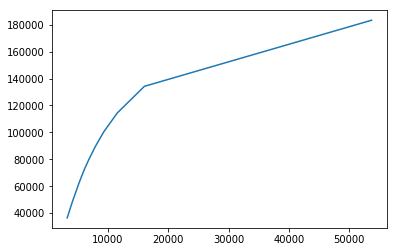

In [67]:
# Analysis for choosing optimum word freq cut off
freqsL = list(range(1, 80, 5))
num_words = []
num_sents = []
for x in freqsL:
    filtered_words = dp.filter_words(word_freqs, x)
    num_words.append(len(filtered_words))
    num_sents.append(len(dp.get_sentences_with_words(clean_jokes, filtered_words)))
plt.plot(num_words, num_sents)
plt.show()

In [72]:
# Considering only words which have a frequency of atleast 15 and the corresponding sentences
final_vocabulary = dp.filter_words(word_freqs, 15)
print("Number of filtered words = ", len(filtered_words))
final_clean_jokes = dp.get_sentences_with_words(clean_jokes, filtered_words)
print("Number of sentences: ", len(sents))

Number of filtered words =  9656
Number of sentences:  102663


In [76]:
# Let's append sos and eos tokens to all sentences
clean_jokes_final = [["sos"] + tokens + ["eos"] for tokens in final_clean_jokes]
vocabulary_final = final_vocabulary.extend(["sos", "eos"])
print("Final vocabulary size: ", len(final_vocabulary))
print("Number of sentences: ", len(clean_jokes_final))

Final vocabulary size:  9660
Number of sentences:  102663


In [80]:
with open("./datasets/jokes.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)
    
with open("./datasets/vocabulary.pickle","wb") as fop:
    pickle.dump(clean_jokes_final, fop)